# Reading files with AICSImageIO

The [AICSImageIO library](https://github.com/AllenCellModeling/aicsimageio) aims streamlining reading microscopy image data. There is also a [napari plugin](https://github.com/AllenCellModeling/napari-aicsimageio#napari-aicsimageio), but here we explain how to read it with the library.

To install the library, you need to call these commands. 

```
mamba install aicsimageio bioformats_jar
```

In case some specific proprietary file formats fails to be read, additional software must be installed. [Check the documentation for details](https://github.com/AllenCellModeling/aicsimageio#extra-format-installation). 

For this notebook, we also need to install [aicspylibczi](https://pypi.org/project/aicspylibczi/) to be able to read a `.czi` file:

```
pip install aicsimageio aicspylibczi>=3.1.1 fsspec>=2022.8.0
```

In [1]:
from aicsimageio import AICSImage

from skimage.io import imshow

First, we create an `AICSImage` object to see if it understands our file format.  In the following we are using an image showing a Drosophila wing during pupal stage kindly provided by Romina Piscitello-Gómez (MPI CBG).

In [2]:
aics_image = AICSImage("../../data/PupalWing.czi")
aics_image

<AICSImage [Reader: CziReader, Image-is-in-Memory: False]>

This object can already give us basic information such as image size/shape, dimensions and dimension names and order.

In [3]:
aics_image.shape

(1, 1, 80, 520, 692)

In [4]:
aics_image.dims

<Dimensions [T: 1, C: 1, Z: 80, Y: 520, X: 692]>

In [5]:
aics_image.dims.order

'TCZYX'

From this object, we can also retrieve pixels as numpy arrays.

In [6]:
np_image = aics_image.get_image_data("ZYX", T=0)
np_image.shape

(80, 520, 692)

c:\Users\mazo260d\mambaforge\envs\devbio-napari-env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


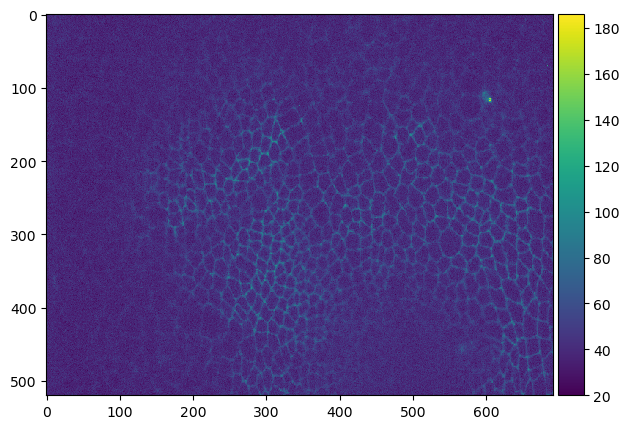

In [7]:
imshow(np_image[36])

## Reading meta data

When working with microscopy image data, it is important to be aware of meta data, for example the voxel size. In order to do volume measurements in proper physical units, we need to know how large a voxel is in X, Y and Z.

In [8]:
aics_image.physical_pixel_sizes

PhysicalPixelSizes(Z=1.0, Y=0.20476190476190476, X=0.20476190476190476)

And one can define a helper function for reading the voxel size in Z/Y/X format.

In [9]:
def get_voxel_size_from_aics_image(aics_image):
    return (aics_image.physical_pixel_sizes.Z,
            aics_image.physical_pixel_sizes.Y,
            aics_image.physical_pixel_sizes.X)

In [10]:
voxel_size = get_voxel_size_from_aics_image(aics_image)
voxel_size

(1.0, 0.20476190476190476, 0.20476190476190476)

## Exercise

Load this image to napari with the correct pixel sizes.

_Hint: Set the `scale` argument of the `.add_image` method with the voxel size._